# Building our first CNN using Keras in TensorFlow 2.0

### Creating a model based on the MNIST Dataset of Handwrittent Digits

### Step 1: Lets load our dataset

#### load_data():

Returns: **2 tuples**
- x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32) or (num_samples, 32, 32, 3) based on the image_data_format backend setting of either channels_first or channels_last respectively.
- y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).

- More info on available datases at https://keras.io/datasets/

In [10]:
from tensorflow.keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

(60000, 28, 28)


In [11]:
# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [12]:
# Using OpenCV
# import opencv and numpy
import cv2 
import numpy as np

# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    img_scaled = cv2.resize(img, None, fx=5, fy=5, interpolation = cv2.INTER_NEAREST)
    cv2.imshow("Randon Sample", img_scaled)
    cv2.waitKey(0)

cv2.destroyAllWindows()     

### Let's do the same thing but using matplotlib to plot 6 images 

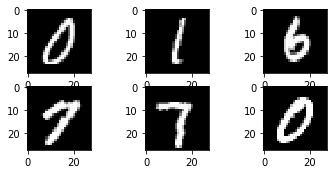

In [13]:
# importing matplotlib
# You'll need to run this twice as matplotlib doesn't generate the plot in the same cell where it was imported
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

### Step 3A - Prepare our dataset for training

In [14]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Step 3B - One Hot Encode Our Labels (Y)

In [15]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


### One Hot Encoding also known
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)

In [16]:
# Look at our raw data
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x3
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
# In our CNN it goes from 12 * 12 * 64 to 9216 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We use another Dropout layer
model.add(Dropout(0.5))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.01)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

![alt text](https://raw.githubusercontent.com/rajeevratan84/MasterOpenCV/master/CNN2.JPG "Our Convolutional Neural Network")




### Step 5 - Train our Model
- We place our formatted data as the inputs and set the batch size, number of epochs
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [20]:
batch_size = 32
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.5628 - accuracy: 0.8239 - val_loss: 0.2091 - val_accuracy: 0.9386
Epoch 2/10
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.2954 - accuracy: 0.9118 - val_loss: 0.1405 - val_accuracy: 0.9554
Epoch 3/10
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.2305 - accuracy: 0.9311 - val_loss: 0.1111 - val_accuracy: 0.9662
Epoch 4/10
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.1814 - accuracy: 0.9467 - val_loss: 0.0852 - val_accuracy: 0.9738
Epoch 5/10
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.1529 - accuracy: 0.9545 - val_loss: 0.0708 - val_accuracy: 0.9774
Epoch 6/10
60000/60000 [==============================] - 142s 2ms/sample - loss: 0.1317 - accuracy: 0.9606 - val_loss: 0.0627 - val_accuracy: 0.9795
Epoch 7/10
60000/60000 [==========================

### Step 6 - Ploting our Loss and Accuracy Charts

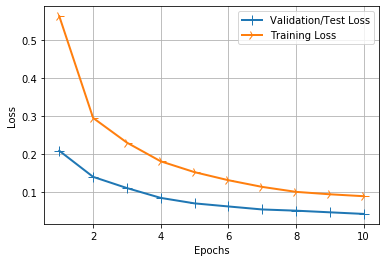

In [23]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Now plot our Accuracy Charts

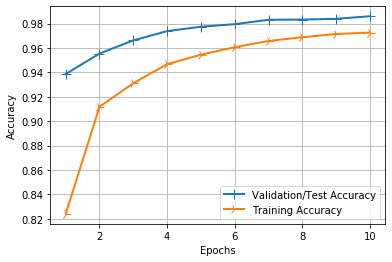

In [29]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Step 7A - Saving our Model

In [30]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


### Step 7B - Loading our Saved Model

In [17]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

### Step 8 - Testing our Model on Our Test Data

In [18]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

# Testing our CNN on Actual Real Data

In [19]:
import numpy as np
import cv2
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel
       
image = cv2.imread('images/numbers.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", image)
cv2.waitKey(0)

# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#cv2.imshow("blurred", blurred)
#cv2.waitKey(0)

edged = cv2.Canny(blurred, 30, 150)
#cv2.imshow("edged", edged)
#cv2.waitKey(0)

# Find Contours
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2.imshow("ROI", roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict_classes(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", image)
        cv2.waitKey(0) 
        
cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

The number is: 13540


In [35]:
image.shape

(532, 872, 3)